In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.__version__


'1.25.2'

In [ ]:
import torch
import torch.nn as nn

In [ ]:
torch.__version__

'2.2.1+cu121'

#Preprocessing: Dataset (raw  data)

In [ ]:
import pandas as pd

# ----------------------
# original data: boston house price data.
# 'http://lib.stat.cmu.edu/datasets/boston'
# original data의 경우, 1개의 sample에 2개의 행이 할당되어
# 이에 대한 처리가 필요함.
data_url = 'https://blog.kakaocdn.net/dn/bBaIM3/btsGBsBNUDl/irTKKK1MF1Y1o6JHpGn3n1/boston.csv?attach=1&knm=tfile.csv'

# read_csv
df = pd.read_csv(
    data_url,      # url or file path
    skiprows = 0,  # num of rows to skip
    header = 0,    # header row
    sep = ','      # separator
)
df

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
!ls

sample_data


In [ ]:
%ls

sample_data/


In [ ]:
%pwd

'/content'

In [ ]:
%cd

/root


Boston data는 약간의 처리가 필요함.

이는 아래와 같은 특성이 있기 때문임.

하나의 데이터가 2라인으로 분포하고 있음. 이를 하나의 라인으로 처리.
짝수행의 데이터에서는 3개 열 외는 NaN이므로 제거해야함.
짝수행의 3번째 열이 바로 집값에 해당함.
이를 반영하여 506개의 sample을 가지며, 하나의 sample은 13개의 feature를 가지는 input data인 x_raw와 이에 대응하는 label값을 가지는 y_raw를 생성해야함.

In [ ]:
df.head(3)


,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
type(df.values)

numpy.ndarray

In [ ]:
tmp_raw = df.values
tmp_raw.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RN       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
x_raw = tmp_raw[:,:13] # 14번째는 정답이므로 분
y_raw = tmp_raw[:,13]

print(x_raw.shape)
print(y_raw.shape)

(506, 13)
(506,)


In [ ]:
y_raw= y_raw.reshape(-1,1)
print(y_raw.shape)

(506, 1)


In [ ]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RN',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PIRATIO',
    'B',
    'LSTAT',
    'MEDV'
]
df = pd.DataFrame(np.hstack([x_raw,y_raw.reshape(-1,1)]), columns=features)

df.to_csv('boston.csv',index=False)
df.info() #숫자형임을 파악 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RN       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Pandas를 활용한 Exploration
correlation이 강해보이는 feature를 살펴봄

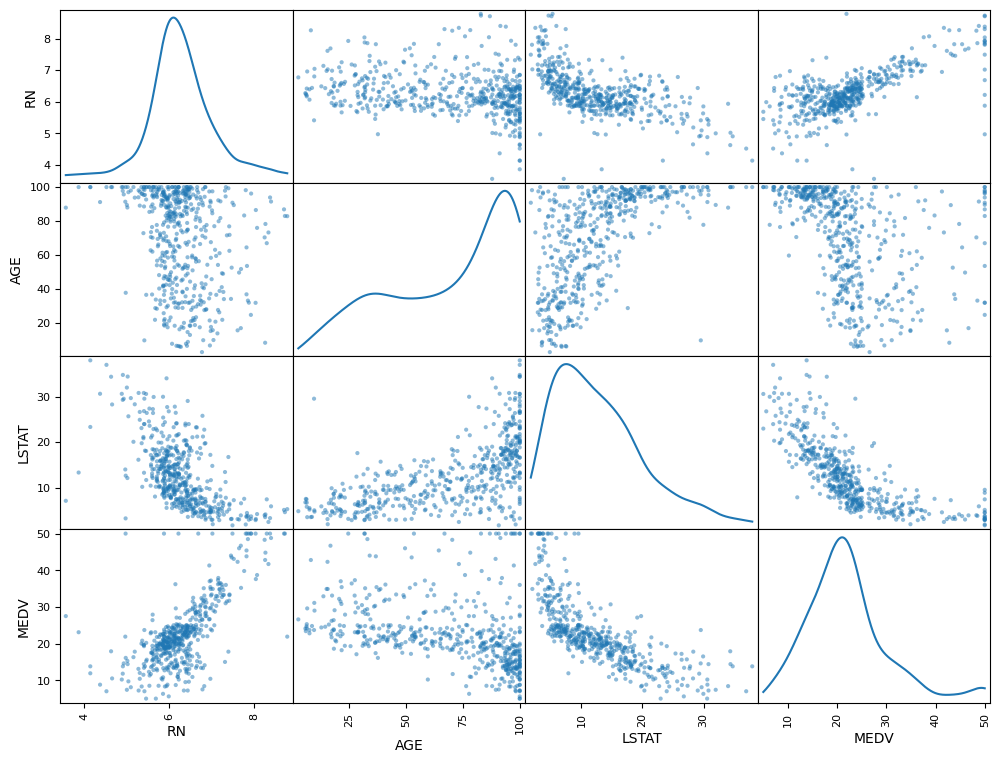

In [ ]:
from pandas.plotting import scatter_matrix as sm

sm(df[['RN','AGE','LSTAT','MEDV']], diagonal='kde', figsize=(12,9))
plt.show()


Text(0.5, 1.0, 'RN vs. MEDV')

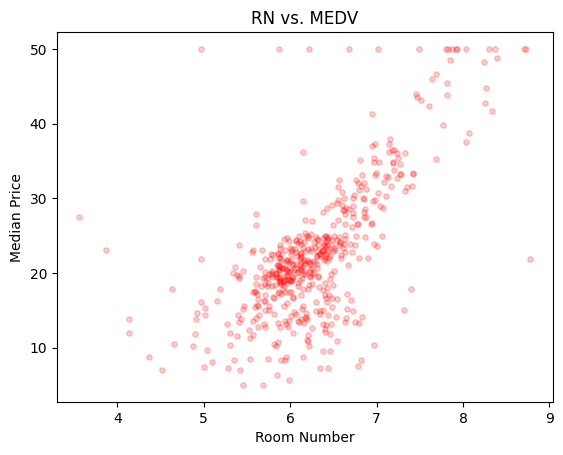

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1)
axes.scatter(df['RN'],df['MEDV'],
             alpha=0.2,
             s=15,
             c='r'
             )
axes.set_xlabel('Room Number')
axes.set_ylabel('Median Price')
axes.set_title('RN vs. MEDV')

# DataLoader 및 Dataset 만들기
x_raw와 y_raw 를 numpy로 다음과 같이 만들 수 있음.

하지만, 이 문서에서는 연습용으로 DataFrame df를 주로 사용함.

In [ ]:

# tmp = df[['RN','MEDV']].values
# tmp = df[['RN','AGE','LSTAT','MEDV']].values
tmp = df[df.columns].values
x_raw = tmp[:,:-1]# 모든 행과 마지막 열 제외 모든 열 선택
y_raw = tmp[:,-1:]# 모든 행과 마지막 열만 선택

print(x_raw.shape)
print(y_raw.shape)

(506, 13)
(506, 1)


Trainset과 Testset으로 나눔.

보다 나은 성능을 위해선 stratified sampling을 권함.
Boston 데이터셋에 stratified sampling을 적용하려면, 집값에 대한 카테고리로 데이터를 나누는 처리가 필요함.

In [ ]:
from sklearn.model_selection import train_test_split #random 하게 뽑아서 train

x_train, x_test, y_train, y_test = train_test_split(
    x_raw, y_raw,
    test_size = 0.1, #전체 데이터의 10%를 테스트 세트로 지정
    random_state = 23, #무작위 분할 위한 시드, 재현가능 결과 얻기 위해 사용
)

print(x_train.shape, x_test.shape) # train과 test 구분

(455, 13) (51, 13)


#Data Scaling(=Feature Scaling)


In [ ]:
from sklearn.preprocessing import StandardScaler
from pickle import dump, load
# fit: data를 읽어서 평균, 분산 구함(모델 훈련), transform: 그 결과값을 가지고 데이터 입력 바꿔줌
scaler = StandardScaler() #객체 생성
x_train_scaled = scaler.fit_transform(x_train) #fit과 transform 둘다 해줌, 훈련 세트의 평균과 표준편차 계산후 이를 사용해 데이터 표준화
x_test_scaled = scaler.transform(x_test) #transformer은 전처리 담당

# pickle을 이용한 저장.scaler패키지 통째로 저장, 읽고 적재 (직렬화 시켜 저장)
with open('standard_scaler.pkl', 'wb') as f: #pickle사용하여 표준화된 데이터 변환기(scaler)를 파일로 저장위해 파일을 바이너리 모드로 엶
    dump(scaler, f)# 파일에 객체 저장

with open('standard_scaler.pkl', 'rb') as f: #읽기모드로 엶
    loaded_scaler = load(f)
    tmp = loaded_scaler.transform(x_test)

    print(f' Is equal data?: {np.array_equal(tmp, x_test_scaled)}') # pikle버전으로 파일이 깨질수가 있기때문에 버전을 적용해 기록(계속 업뎃)
    #저장된 변환기가 제대로 로드되었는지 확인(데이터 세트 변환 결과와 처음 테스트 세트 변환 결과 비교, 동일여부 출력)

 Is equal data?: True


# Dataset과 DataLoader

In [ ]:
from torch.utils.data import Dataset

class BostonDataset(Dataset):
  def __init__(self, features, targets, transformer=None): #클래스 생성자 메서드, 데이터 셋 초기화
    self.features = features #입력 특성
    self.targets = targets #출력 값
    self.transformer = transformer #getitem하면 알아서 처리해줌

  def __len__(self): # 개수 반환
    return len(self.features)

  def __getitem__(self, idx): #주어진 인덱스에 해당하는 샘플 반환

    if self.transformer is None: #변환기 제공 x시 원본데이터 사용
      _feature = self.features[idx]
    else:
      _feature = self.transformer.transform([self.features[idx]])[0] # 변환기 제공시 입력 데이터 변환기 사용해 전처리, 변환데이터중 첫번쨰 요소 선택하여 반환
      # transform은 sample의 리스트로 arg를 해야함. 하나씩만 뱉는게 getitem

    _feature = torch.tensor(_feature).float() #입력 데이터 텐서로 변환, 데이터 타입 float로 제ㅣ정
    _target = torch.tensor(self.targets[idx]).float() #호환성 위해 float값 ()로 표시
    return _feature, _target #묶인 collection이 반환됨, 반환값 두개이상 불가능

In [ ]:
from torch.utils.data import DataLoader
from typing import Iterable, Iterator


x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, #train만 추가
    test_size = 0.1, #1%떼어냄
    random_state = 23,
)

train_dataset = BostonDataset(x_train, y_train, scaler)# 훈련 데이터 셋 위한 객체 생성, 입출력데이터 전달하고 scaler.객체로 데이터전처리
 #training dataset에서만 훈련 시켜야함, data 많을때,,,
valid_dataset = BostonDataset(x_valid, y_valid, scaler) #검증데이터 셋 위한 객체 생성 검증용 입출력데이터 전달, 전처리
print(len(train_dataset))
train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = 100, #110으로 훈련시킴
    shuffle = True,#무작위
)
valid_loader = DataLoader(
    dataset = valid_dataset,
    batch_size = 32, # 내려가는 것만 보기때문에 없어도 될지도
    shuffle = True,
)
print(f'{isinstance(train_loader, Iterable)=}')
print(f'{isinstance(iter(train_loader), Iterable)=}')# iterable가능여부 출력
tmp_feature, tmp_label = next(iter(train_loader))# 훈련 DataLoader에서 첫번째 미니배치 가져와 특성과 라벨로 분리
print(f'{tmp_feature.shape=}, {tmp_label.shape=}')

409
isinstance(train_loader, Iterable)=True
isinstance(iter(train_loader), Iterable)=True
tmp_feature.shape=torch.Size([100, 13]), tmp_label.shape=torch.Size([100, 1])


# Custom Module구현

In [ ]:
import torch
from torch.nn import Module, init, Linear, Parameter, ReLU
from torch import optim
import torch.nn as nn

class CustomANN(nn.Module):
    def __init__(self, n_in_f, n_out_f):
        super().__init__() # nn.Module의 생성자를 호출하여 초기화, customann class가 nn.module의 기능 상속
        #출력층 정의
        self.fc1 = nn.Linear(n_in_f, 32) #첫번째 선형 레이어 정의(입력:n_in_f, 출력특성: 32)
        self.relu1 = nn.ReLU() #활성화 함수 정의, 선형 레이어 출력에 적용

        self.fc3 =nn.Linear(32, 32)
        self.relu3 =nn.ReLU()

        self.fc2 = nn.Linear(32, n_out_f)#이전 레이어의 출력크기 32,출력특성의 수 n_out_f인 선형변환 수행
        #활성화 함수 거친 이전 레이어의 출력을 입력으로 받아 선형 변환 수행

        with torch.no_grad():
        #  이 블록 내에서의 연산은 자동 미분(autograd)에서 제외
            # linear0의 bias를 상수 0. 으로 초기화
            init.constant_(self.fc1.bias, 0.)

            # Xavier 초기화 방식으로 초기화
            init.xavier_uniform_(self.fc1.weight)

    #예측 함수 정의
    def forward(self, x): #입력 데이터 x를 받아 모델 통과, 출력값 계산 순전파 메서드 정의
        x = self.fc1(x) #첫번째 선형 레이어 통과
        x = self.relu1(x)# 첫번째 레이어의 출력에 ReLU함수 적용
        x = self.fc3(x)
        x = self.relu3(x)
        y = self.fc2(x) #  활성화 함수 거친 출력을 두번째 선형 레이어에 통과시켜 최종출력값 y계산
        return y #계산된 출력값 반환

In [ ]:
#훈련 데이터로부터 미니배치 추출
x_tensor, y_tensor = next(iter(train_loader)) #train_loader에서 첫 번째 미니배치를 가져와서 x_tensor와 y_tensor에 할당
m = CustomANN(x_tensor.shape[-1], y_tensor.shape[-1]) #입력 데이터의 특성 수와 출력 데이터의 특성 수를 기반으로 CustomANN 모델을 초기화
print(f'{x_tensor.shape=}') #텐서의 크기를 확인

tmp = m(x_tensor)
print(f'{tmp.shape=}')

x_tensor.shape=torch.Size([100, 13])
tmp.shape=torch.Size([100, 1])


우선은 cpu에 만들어지며, model의 parameters에 해당하는 tensor들을 통해 어디에 model이 있는지를 확인 가능함.

In [ ]:
for params in m.named_parameters(): #튜플임
  print(params)

('fc1.weight', Parameter containing:
tensor([[ 0.2762,  0.0297,  0.2912,  0.2796, -0.2300, -0.0014, -0.1623,  0.0121,
         -0.2789,  0.3430,  0.0556,  0.1211,  0.0107],
        [ 0.1906, -0.1206, -0.3079, -0.2350, -0.2754, -0.0141,  0.1122, -0.3081,
          0.3572, -0.2727, -0.1159, -0.3485, -0.3065],
        [ 0.3137, -0.2155, -0.2211, -0.0163,  0.1788,  0.0937, -0.0013,  0.1457,
          0.0562, -0.3241,  0.0045,  0.2234,  0.2332],
        [-0.1742, -0.3082,  0.2724,  0.2454,  0.3384, -0.3591,  0.2693,  0.0736,
         -0.1944, -0.1973, -0.1628,  0.2628, -0.0525],
        [ 0.2692,  0.2427, -0.0957, -0.0117, -0.3012, -0.3219, -0.2013, -0.0712,
          0.2580,  0.2879,  0.3403,  0.3625, -0.1753],
        [-0.1173,  0.0375, -0.3569,  0.1625,  0.3229,  0.0116, -0.0918,  0.3270,
         -0.1838,  0.2545, -0.0921,  0.1728,  0.2935],
        [-0.1126, -0.3591,  0.0118, -0.2044,  0.0024, -0.2706,  0.1740,  0.0268,
         -0.2382, -0.1753, -0.2004, -0.0741, -0.2679],
        [-0

In [ ]:
next(m.parameters()).device #paramaters는 이터레이터

device(type='cpu')

In [ ]:
trainable_params_cnt = 0 # 복잡한 모델은 trainable params가 많음
for params in m.parameters(): #param얻어옴
  if params.requires_grad == True: #  train을 못하도록 고정시켜두는 경우가 발생하기도 하기 때문에 true로 설정
    trainable_params_cnt += params.numel()

print(f'{trainable_params_cnt=}')# 전체 필요한 데이터 사이즈 반환


trainable_params_cnt=1537


In [ ]:
device = (
      "cuda" if torch.cuda.is_available() #cuda가 성능이 가장 좋음
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  ) # 튜플이 아님, 연산자 순서 결정하는 것( 쉼표가 없음)
print(f"{device=}")

device='cpu'


In [ ]:
import torch
import torch.nn as nn
import os
def train_loop(dataloader, #데이터 로더에서 뽑아옴
               m, #모델
               lr = 1e-2, n_epochs = 60000, #몇번 수행할지
               device = "cpu"): # 디바이스를 넘겨줌, cpu에 맞춰 코딩

  log_hist = torch.zeros([0,3]).to(device) # 행0 열3개에 데이터 저장 (에포크, 트레이닝 로스, 벨리데이션 로스를 저장할 변수 초기화)
  m = m.to(device) # 모델이 디바이스로 이동

  l = nn.MSELoss()
  optimizer = torch.optim.SGD(m.parameters(), lr=lr) #손실함수, 옵티마이저 초기화

  for epoch in range(n_epochs):# 주어진 에포크 수만큼 반복
    print(f'\r {epoch}',end='') #\r: 커서가 맨 앞으로 감, 다시 적게됨 -> 한줄에서 계속 업뎃되는 형태
    for x_tensor, y_tensor in dataloader: #데이터로더 배치가 결정 (미니배치마다 반복)

      x_tensor = x_tensor.to(device) #gpu로 보내줌
      y_tensor = y_tensor.to(device)

      pred = m(x_tensor)# 모델로부터 예측값 계산

      loss = l(pred, y_tensor)# 손실 함수를 사용하여 손실 계산
      if torch.isinf(loss): # 로스가 발산할시 끊어주는 루틴
        print(f'Error: loss is infinity!')
        break

      optimizer.zero_grad() # 아래 세가지는 붙어서 수행 시키는게 편함(그래디언트 초기화)
      loss.backward() # 각 노드들의 grdiant계산
      optimizer.step() #파라미터 연결시켜 업데이트 (step)

    with torch.no_grad():# 그래디언트가 필요하지 않으므로 torch.no_grad() 블록 사용

      for x_tensor, y_tensor in valid_loader:
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)
        pred = m(x_tensor)# 모델로부터 예측값 계산

        e_loss = l(pred, y_tensor)# 검증 손실 계산


    if epoch % 100 == 0: # 100번째 epoch 마다 로그 출
      tmp = torch.tensor([epoch, loss.item(), e_loss.item()]).to(log_hist.device)
      log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 ) # 행으로 계속 붙여줌
      print(f' Epoch / loss {loss.item():.4f} / val_loss {e_loss.item():.4f}')

    if epoch == n_epochs-1:
      print(f' Epoch / loss {loss.item():.4f} / val_loss {e_loss.item():.4f}')# 마지막도 출력시킴

  return m,log_hist

In [ ]:
m = CustomANN(13,1)
%time final_model, log_hist = train_loop(train_loader, m, 1e-2, 1000, device) # case 3, 훈련 데이터로 학습 수행 소요시간 측정


 0 Epoch / loss 111.3841 / val_loss 109.9383
 100 Epoch / loss 5.2635 / val_loss 60.1591
 200 Epoch / loss 2.0149 / val_loss 16.1005
 300 Epoch / loss 1.7128 / val_loss 3.2373
 400 Epoch / loss 1.8201 / val_loss 5.5325
 500 Epoch / loss 0.8243 / val_loss 30.8362
 600 Epoch / loss 0.6744 / val_loss 2.7854
 700 Epoch / loss 2.1741 / val_loss 8.8809
 800 Epoch / loss 2.9886 / val_loss 4.9843
 900 Epoch / loss 1.7617 / val_loss 42.6779
 999 Epoch / loss 0.4316 / val_loss 40.8196
CPU times: user 1min 18s, sys: 723 ms, total: 1min 19s
Wall time: 1min 22s


#결과확인

In [ ]:
start = 0 # 그래프 시작점

if device != "cpu":
  log_hist = log_hist.to("cpu") #cpu로 옮겨서 그림

fig, axes = plt.subplots(1,1)
axes.set_title('learning curve')
axes.plot(log_hist.detach()[start:,0], log_hist[start:,1], label='train')
axes.plot(log_hist.detach()[start:,0], log_hist[start:,2], label='valid')
axes.legend()
axes.grid()
fig.show()

In [ ]:
if device != "cpu":
  final_model = final_model.to("cpu") #final 모델을 cpu로 가져옴

x_scaled_test = scaler.transform(x_test) #SCALER로 트렌스폼해줌
y_pred = final_model(torch.tensor(x_scaled_test).float()).detach()

from sklearn.metrics import r2_score # 값이 크면 클수록 설명이 잘됨을 의미 (예측력 평가)

print(f'{r2_score(y_test,y_pred)=}') #실제값(y_test)과 예측값(y_pred) 간의 R^2 점수를 계산하여 출력


r2_score(y_test,y_pred)=0.7828762122141357


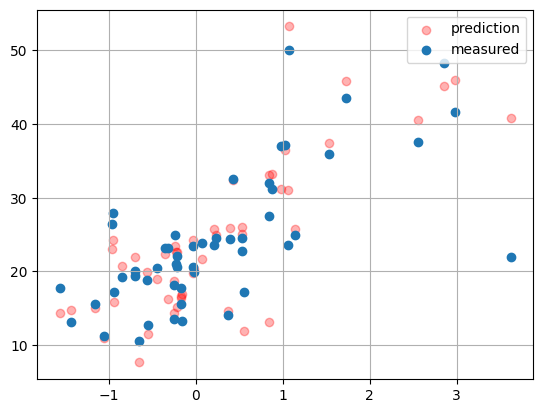

In [ ]:
rns = x_scaled_test[:,0] # x 축에 사용값
if x_scaled_test.shape[1] > 5: # 스케일된 검증 데이터의 열 개수가 5보다 크면, 다섯 번째 특성을 rns 변수에 할당
  rns = x_scaled_test[:,5]

fig, axes = plt.subplots(1,1)
axes.scatter(rns, y_pred, alpha=0.3, c='r', label='prediction') #alpha=0.3은 점의 투명도를 설정
axes.scatter(rns, y_test, label='measured') # x 축에는 rns 변수를, y 축에는 실제값(y_test)을 사용
axes.grid()
axes.legend()